# Holiday Vacation in Honolulu, Hawaii!

![surfs-up.jpeg](Images/surfs-up.jpeg)

I've decided to treat myself to a long holiday vacation in Honolulu, Hawaii! To help with my trip planning, I need to do some climate analysis on the area. 



I used Python and SQLAlchemy to do basic climate analysis and data exploration of the climate database. All of the following analysis have been done using SQLAlchemy ORM queries, Pandas, and Matplotlib.

##### Resources: [hawaii.sqlite]
<ul>

<li> Climate Analysis and Exploration </li>
<li> Precipitation Analysis</li>
<li> Station Analysis</li>
<li> Temperature Analysis </li>
<li> Rainfall per Weather station Analysis</li>

</ul>
# Climate App

I designed a Flask API based on the queries that I have just developed.



### Routes

* `/api/v1.0/precipitation`

  * Query for the dates and temperature observations from the last year.

  * Convert the query results to a Dictionary using `date` as the key and `tobs` as the value.

  * Return the JSON representation of your dictionary.

* `/api/v1.0/stations`

  * Return a JSON list of stations from the dataset.

* `/api/v1.0/tobs`

  * Return a JSON list of Temperature Observations (tobs) for the previous year.

* `/api/v1.0/<start>` and `/api/v1.0/<start>/<end>`

  * Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.

  * When given the start only, calculate `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date.

  * When given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` for dates between the start and end date inclusive.

## Hints

* You will need to join the station and measurement tables for some of the analysis queries.

* Use Flask `jsonify` to convert your API data into a valid JSON response object.



In [156]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [157]:
import numpy as np
import pandas as pd

In [158]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [159]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [160]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [161]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [162]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [163]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [164]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [165]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
from sqlalchemy import inspect
i=inspect(engine)
c=i.get_columns('measurement')
c

[{'autoincrement': 'auto',
  'default': None,
  'name': 'id',
  'nullable': False,
  'primary_key': 1,
  'type': INTEGER()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'station',
  'nullable': True,
  'primary_key': 0,
  'type': TEXT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'date',
  'nullable': True,
  'primary_key': 0,
  'type': TEXT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'prcp',
  'nullable': True,
  'primary_key': 0,
  'type': FLOAT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'tobs',
  'nullable': True,
  'primary_key': 0,
  'type': FLOAT()}]

In [166]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from today
# Perform a query to retrieve the data and precipitation scores
df=pd.DataFrame(session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23').all())
# Save the query results as a Pandas DataFrame and set the index to the date column
df.set_index('date',inplace=True)
# Sort the dataframe by date
df.sort_index().head()

,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


<IPython.core.display.Javascript object>


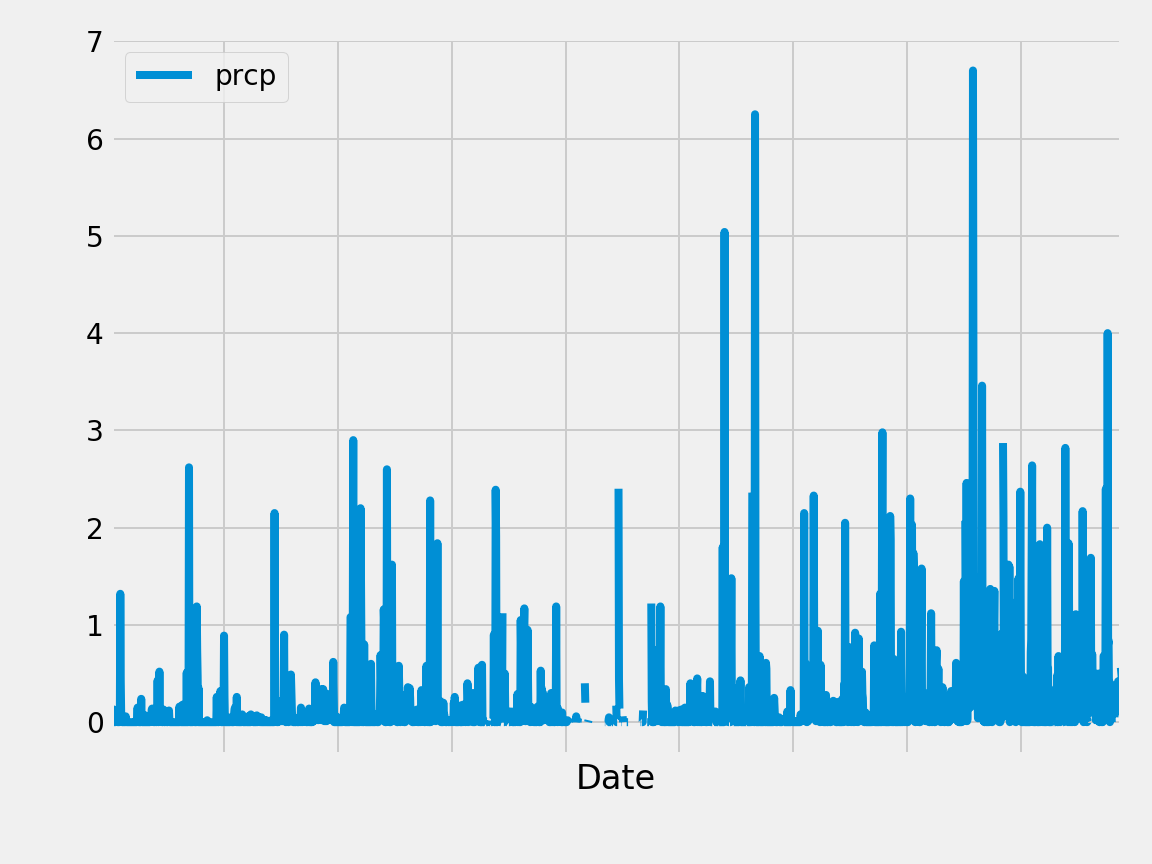

In [189]:
# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates


df.plot.line(figsize=(8,6))
plt.tight_layout()
plt.tick_params(labelbottom=False)
plt.xlabel('Date')
plt.show()
plt.savefig('Precipitation Plot.png')


In [168]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [169]:
# How many stations are available in this dataset?
session.query(Measurement.station).distinct().count()

9

In [170]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.id)).group_by(Measurement.station).\
            order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [171]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs),\
              func.max(Measurement.tobs),func.avg(Measurement.tobs)).group_by(Measurement.station).\
            order_by(func.count(Measurement.id).desc()).first()

(54.0, 85.0, 71.66378066378067)

<IPython.core.display.Javascript object>


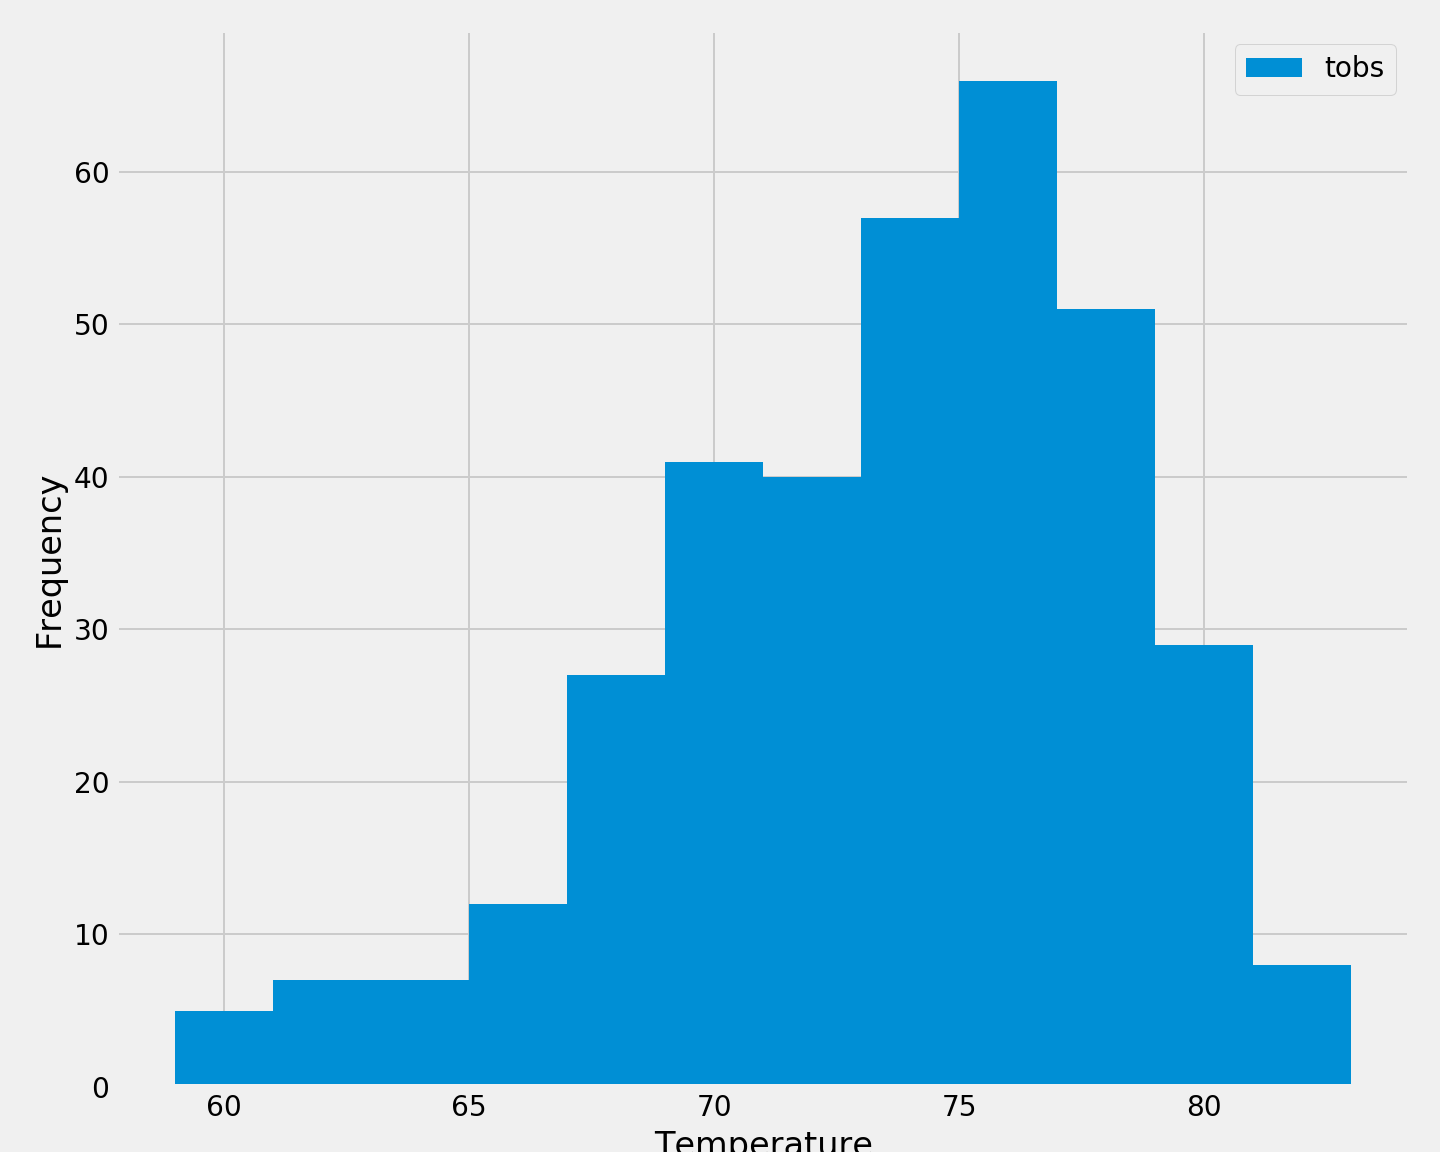

In [193]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

df1=pd.DataFrame(session.query(Measurement.station,Measurement.tobs).filter(Measurement.station=='USC00519281').filter(Measurement.date>'2016-08-24').all())
df1.groupby(['tobs']).count()
df1.plot.hist(bins=12,figsize=(10,8))
plt.tight_layout()
plt.xlabel('Temperature')
plt.show()
plt.savefig('Temperature Observations.png')

In [173]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [174]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps('2017-06-28', '2017-07-10')

[(69.0, 77.81012658227849, 87.0)]

<IPython.core.display.Javascript object>


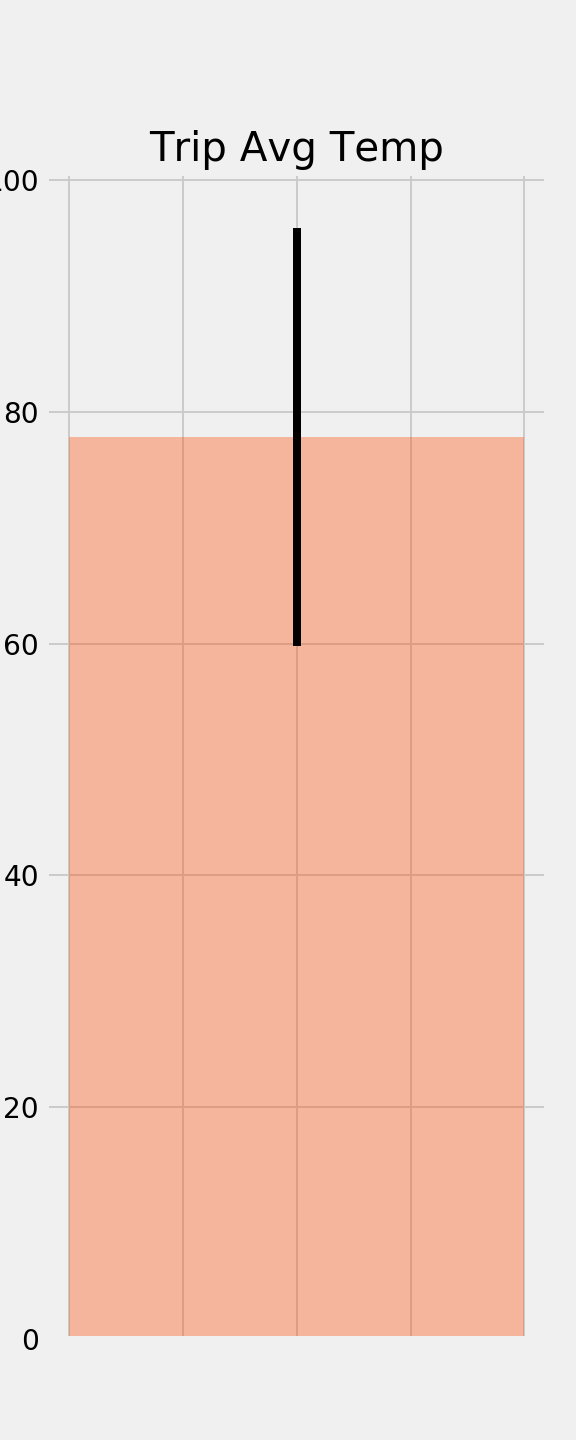

In [185]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
#fig, ax = plt.subplots()
yerr=87.0-69.0
means=77

plt.figure(figsize=(4,10))
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.tick_params(labelbottom=False)
plt.bar(0,77.81, yerr=yerr, align='center', alpha=0.35,color='orangered');
plt.savefig('Trip Avg Temp.png')



In [176]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date='2017-06-28'
end_date='2017-07-10'
s=session.query(Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation,\
                func.avg(Measurement.prcp)).group_by(Measurement.station).\
                filter(Measurement.station==Station.station).\
                filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
                order_by(func.avg(Measurement.prcp).desc()).all()
s

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.12461538461538463),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.060000000000000005),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.04),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  0.03692307692307692),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  0.015384615384615385),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.015),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.010000000000000002)]

In [177]:
pd.DataFrame(s,columns=['station','name','latitude','longitude','elevation','average prcp'])

,station,name,latitude,longitude,elevation,average prcp
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.124615
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.060000
2,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.040000
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.036923
4,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.015385
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.015000
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.010000


In [178]:
pd.DataFrame(s,columns=['station','name','latitude','longitude','elevation','prcp'])

,station,name,latitude,longitude,elevation,prcp
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.124615
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.060000
2,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.040000
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.036923
4,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.015385
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.015000
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.010000


In [179]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
s1=session.query(Measurement.station,func.avg(Measurement.prcp)).group_by(Measurement.station).all()
s2=session.query(Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation).all()
pdf1=pd.DataFrame(s1,columns=['station','prpc'])
pdf2=pd.DataFrame(s2)
pdf3=pd.merge(pdf1,pdf2,how='inner',on='station')
pdf3

,station,prpc,name,latitude,longitude,elevation
0,USC00511918,0.047971,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
1,USC00513117,0.141921,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,0.121058,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00516128,0.429988,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
4,USC00517948,0.063602,"PEARL CITY, HI US",21.39340,-157.97510,11.9
5,USC00518838,0.207222,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
6,USC00519281,0.212352,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00519397,0.049020,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
8,USC00519523,0.114961,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5


## Optional Challenge Assignment

In [180]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [181]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals=[]
# Set the start and end date of the trip

start_date = dt.date(2017,6, 28)
end_date   = dt.date(2017,7, 10)

dates = [ start_date + dt.timedelta(n) for n in range(int ((end_date - start_date).days))]
# Use the start and end date to create a range of dates
dm=[] #List to collect %m-%d strings
for i in dates:
    dm.append(i.strftime("%m-%d"))
# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date
for j in dm:
    normals.append(daily_normals(j)[0])
normals

[(69.0, 74.88679245283019, 80.0),
 (67.0, 74.91525423728814, 80.0),
 (67.0, 75.59615384615384, 81.0),
 (67.0, 74.77777777777777, 81.0),
 (68.0, 75.40384615384616, 82.0),
 (68.0, 75.32075471698113, 87.0),
 (70.0, 76.57142857142857, 81.0),
 (66.0, 75.0, 81.0),
 (69.0, 75.0, 81.0),
 (69.0, 74.91071428571429, 82.0),
 (69.0, 76.08333333333333, 83.0),
 (68.0, 76.19298245614036, 83.0)]

In [182]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_df=pd.DataFrame(normals,columns=['min_temp','ave_temp','max_temp'])
trip_df['dates']=dates
trip_df.set_index('dates',inplace=True)
trip_df

,min_temp,ave_temp,max_temp
dates,,,
2017-06-28,69.0,74.886792,80.0
2017-06-29,67.0,74.915254,80.0
2017-06-30,67.0,75.596154,81.0
2017-07-01,67.0,74.777778,81.0
2017-07-02,68.0,75.403846,82.0
2017-07-03,68.0,75.320755,87.0
2017-07-04,70.0,76.571429,81.0
2017-07-05,66.0,75.000000,81.0
2017-07-06,69.0,75.000000,81.0


<IPython.core.display.Javascript object>


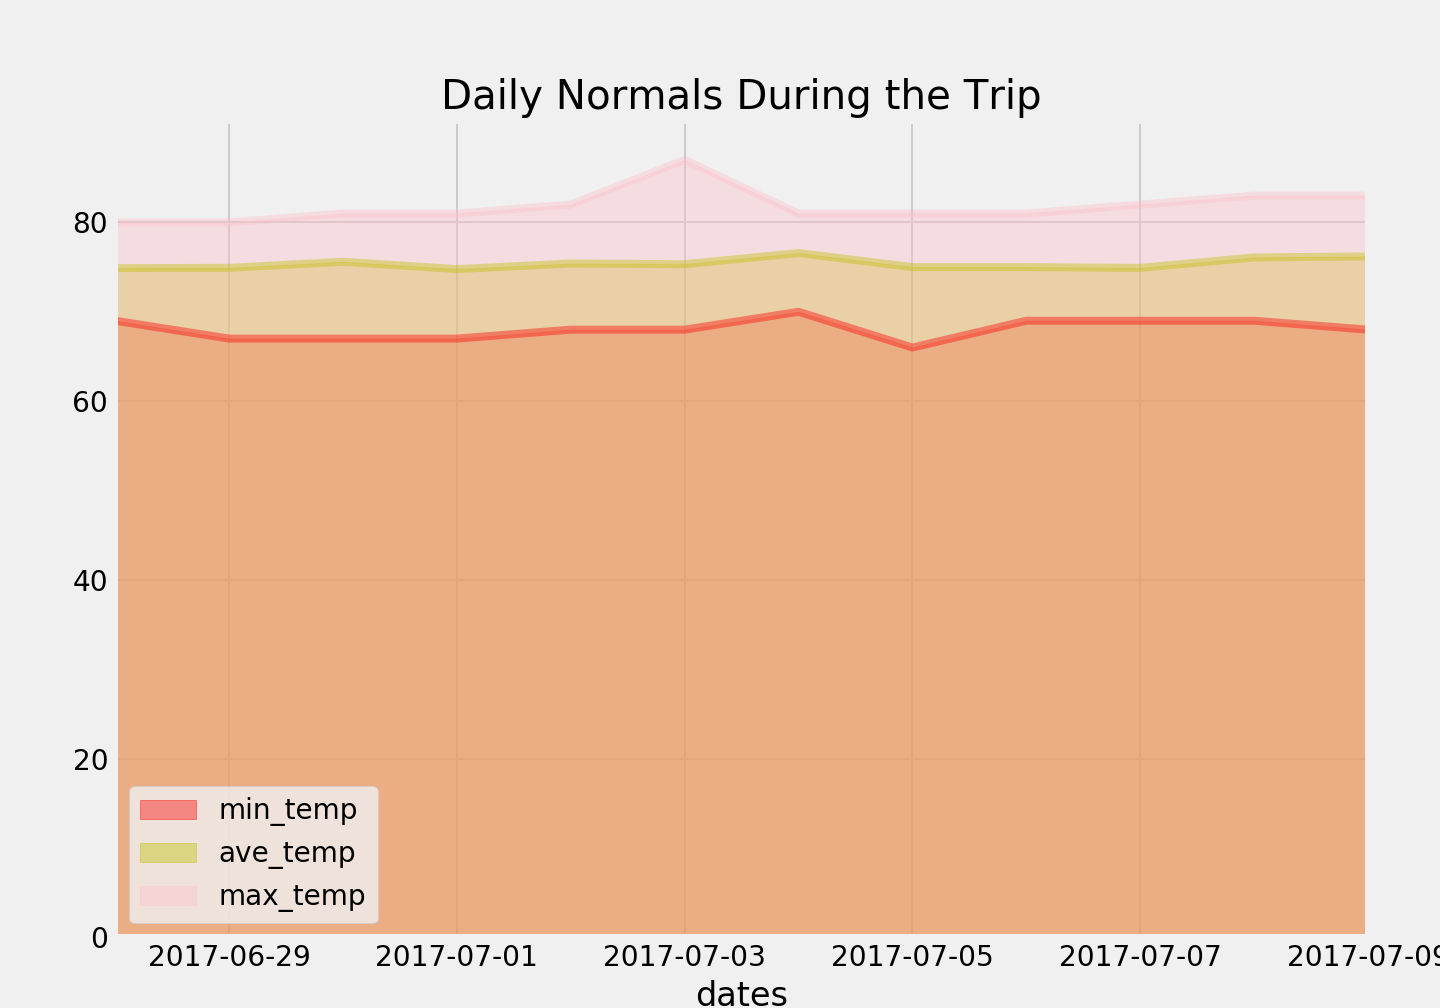

In [183]:
# Plot the daily normals as an area plot with `stacked=False`
trip_df.plot(kind='area',stacked=False,alpha=0.4,
             title='Daily Normals During the Trip',color=['r','y','pink'],figsize=(10,7));
plt.savefig("Daily_normals.png")

  <center> <h1>Thank You! </h1></center>